#### This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

### Key Features:
        BROKERTITLE: Title of the broker
        TYPE: Type of the house
        PRICE: Price of the house
        BEDS: Number of bedrooms
        BATH: Number of bathrooms
        PROPERTYSQFT: Square footage of the property
        ADDRESS: Full address of the house
        STATE: State of the house
        MAIN_ADDRESS: Main address information
        ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
        LOCALITY: Locality information
        SUBLOCALITY: Sublocality information
        STREET_NAME: Street name
        LONG_NAME: Long name
        FORMATTED_ADDRESS: Formatted address
        LATITUDE: Latitude coordinate of the house
        LONGITUDE: Longitude coordinate of the house

source : https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data


In [218]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

In [219]:
df = pd.read_csv('./NY-House-Dataset.csv')
df.info

<bound method DataFrame.info of                                             BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BE

In [220]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [221]:
df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862
std,3.135525e+07,2.602315,1.946962,2377.140894
min,2.494000e+03,1.000000,0.000000,230.000000
25%,4.990000e+05,2.000000,1.000000,1200.000000
50%,8.250000e+05,3.000000,2.000000,2184.207862
75%,1.495000e+06,4.000000,3.000000,2184.207862
max,2.147484e+09,50.000000,50.000000,65535.000000


In [222]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [223]:
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

##### In the line #4 of BATH column we see 2.373861 which doesn't make sense so let's change the type of the column to int

In [224]:
df.BATH= df.BATH.astype(int)
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                             int32
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [225]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


### Now we going to use pairplot for have a general view of the data 

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1

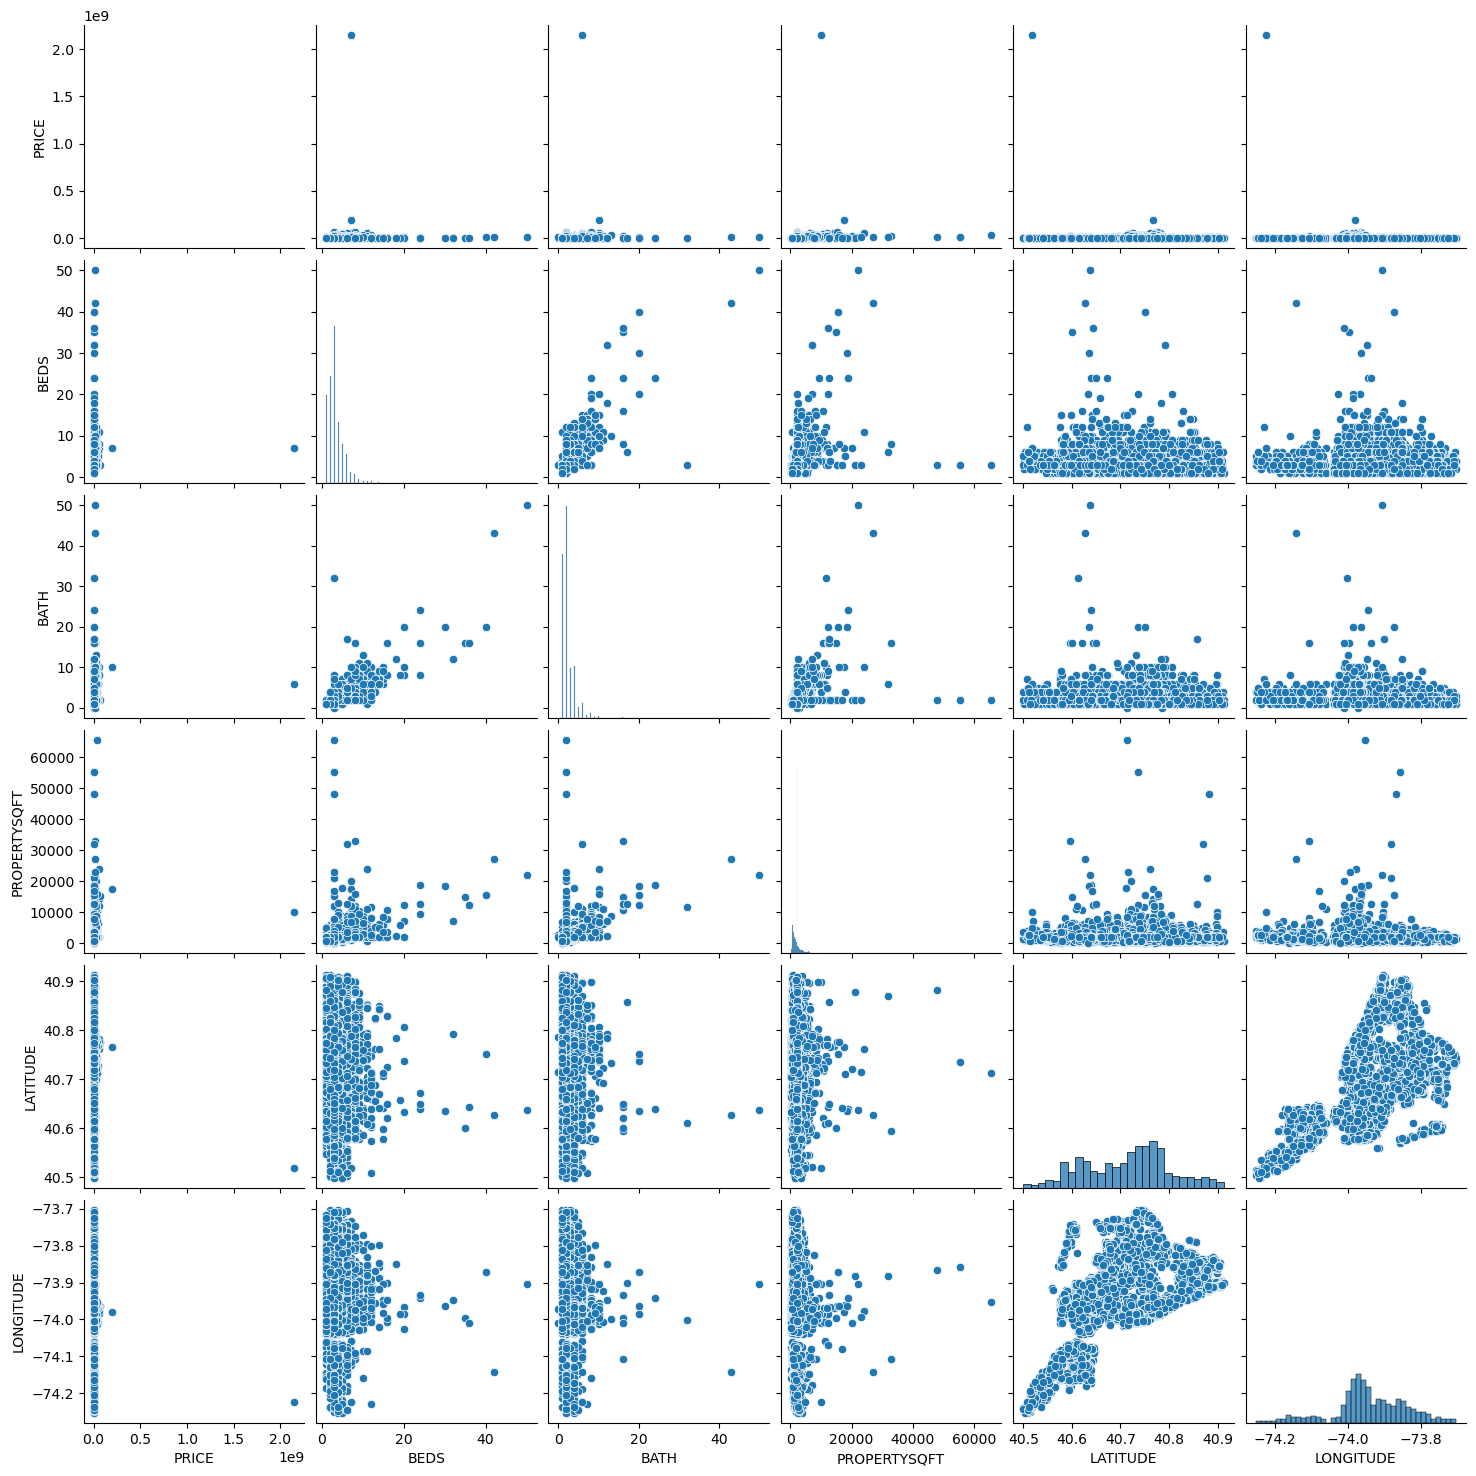

In [226]:
sns.pairplot(data=df)
plt.show()


#### Now I want to see  more close some relations 

<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

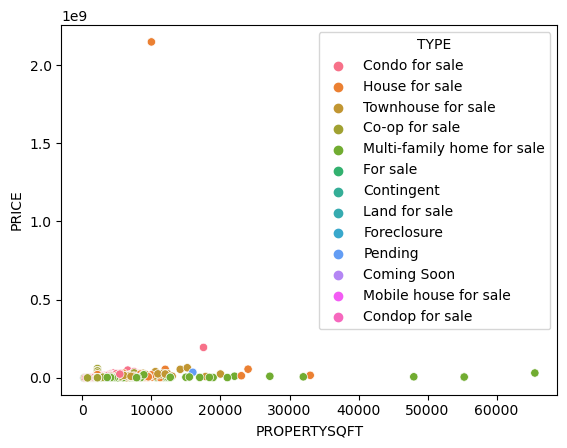

In [227]:
sns.scatterplot(data=df, x ='PROPERTYSQFT', y= 'PRICE', hue='TYPE')

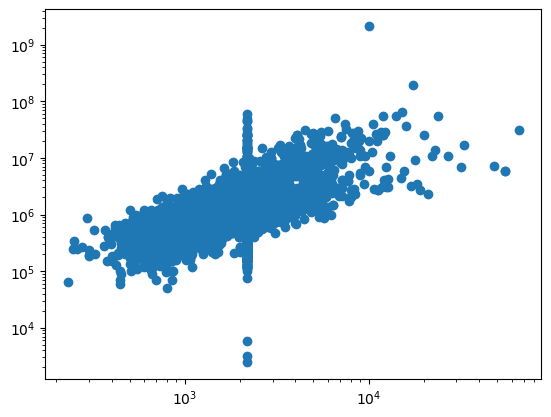

In [228]:
x = df.PROPERTYSQFT
y = df.PRICE
plt.scatter(x, y, marker = "o")
plt.yscale('log')
plt.xscale('log')
plt.show()


### Okay now we know we should work with logarithmic scale because the difference between axes is too big, but before come back to that let's see missing values 

In [229]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [230]:
null_values = df.assign(porcentaje_nulos=df.isna().sum(axis=1) / len(df.columns) * 100)
null_values[null_values['porcentaje_nulos'] > 0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,porcentaje_nulos


#### apparently there isn't missing values on the data, but let's digging some more


<Axes: >

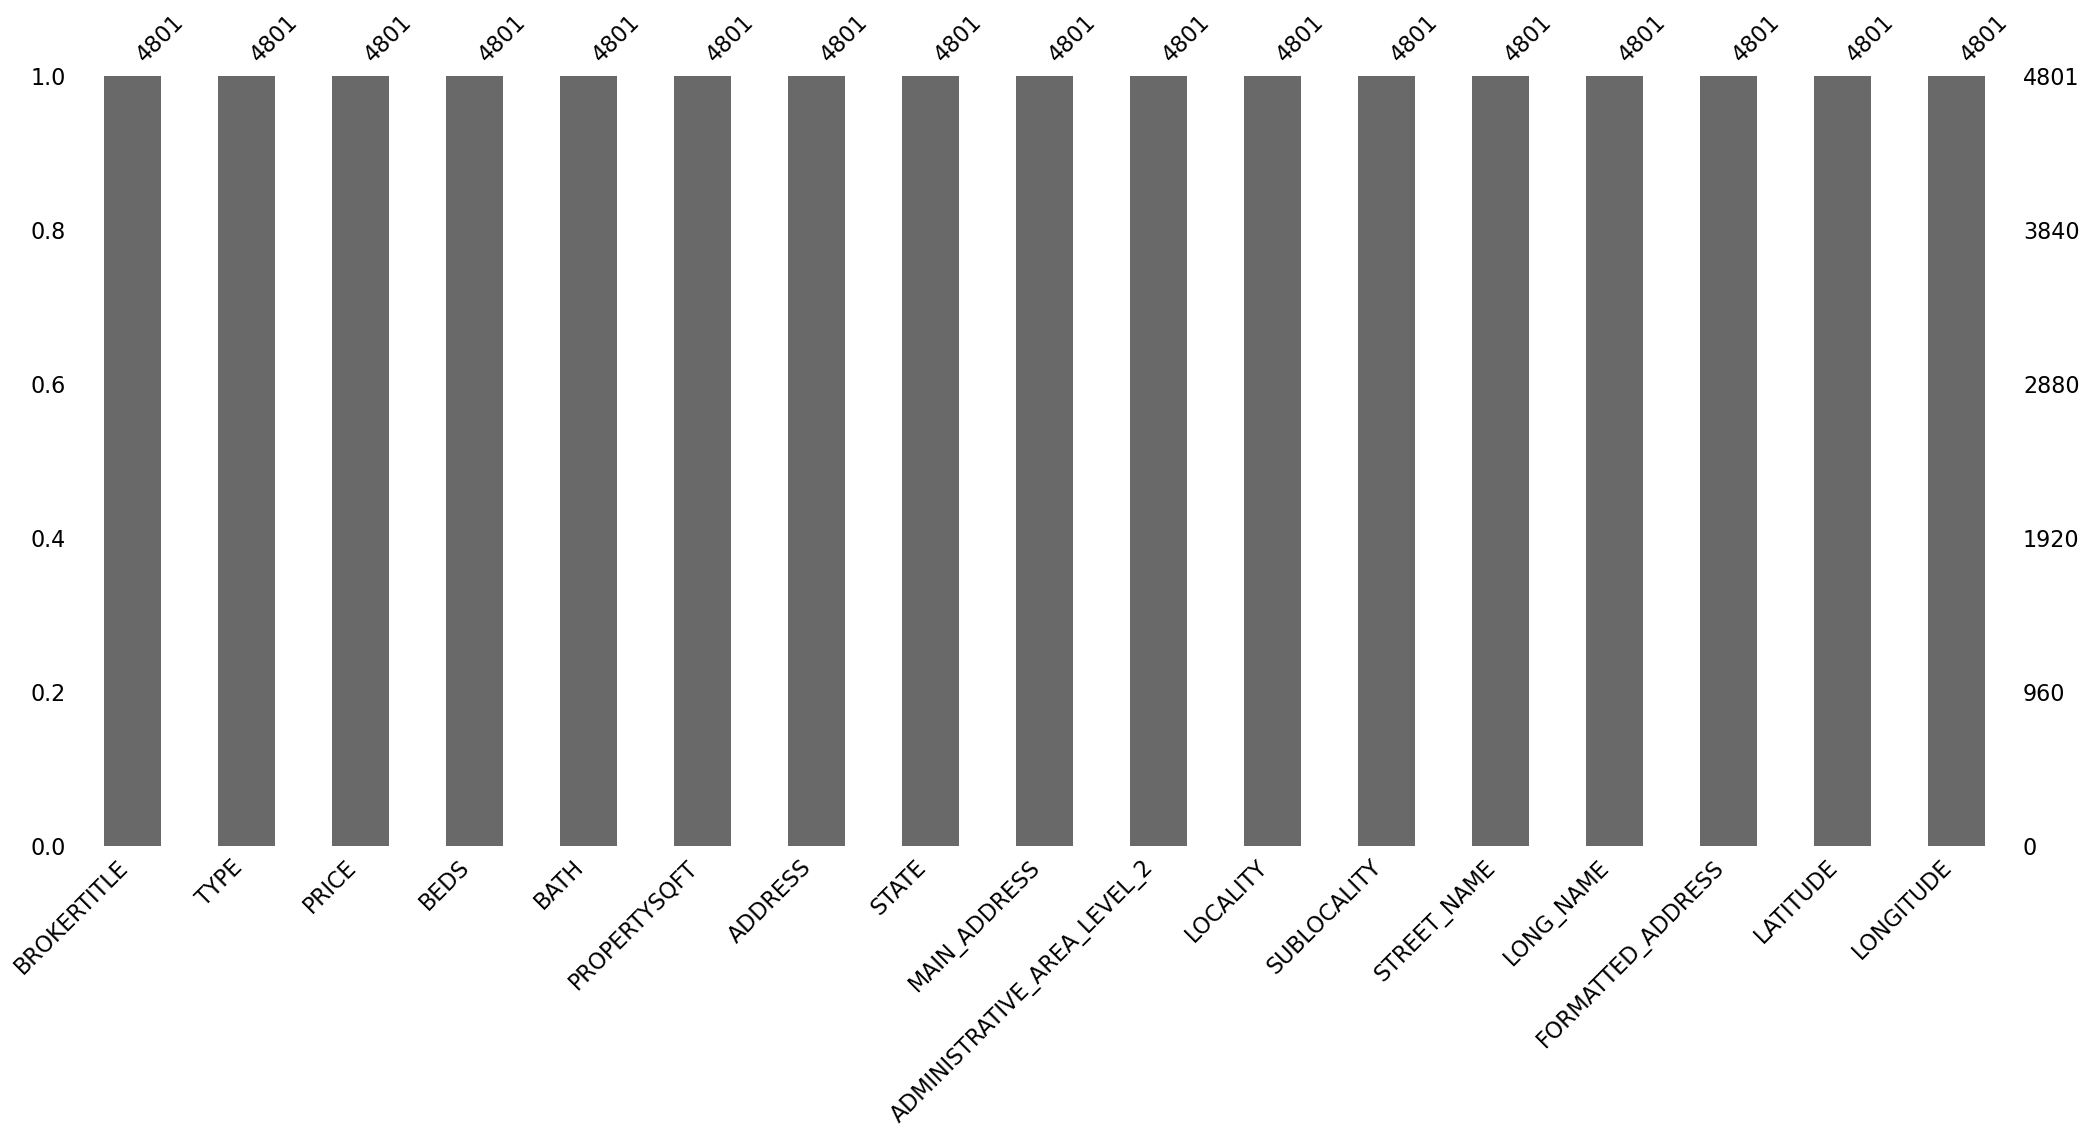

In [231]:
msno.bar(df)

### Backing to the visualizations  I'll use plotly.express for better view in logarithmic scale

In [232]:
import plotly.express as px

In [233]:
scatter_plot = px.scatter(df, x='PROPERTYSQFT', y='PRICE', color='TYPE', title='Price vs. Property Square Footage (Logarithmic Scale)',
labels={'PROPERTYSQFT': 'Property Square Footage', 'PRICE': 'Price', 'TYPE': 'House Type'},
log_x=True, log_y=True)
scatter_plot.show()

### Something was bothering me, If we look closely, we ca see Co-op for sale and others, all of this must be the same. Let's fix this!

In [234]:
df['TYPE'].replace({'Co-op for sale':'Condo for sale', 'Condop for sale':'Condo for sale'}, inplace=True)

In [235]:
box_plot_log = px.box(df, x='TYPE', y='PRICE', color='TYPE' ,title='Price Distribution by House Type (Logarithmic Scale)',
                      labels={'TYPE': 'House Type', 'PRICE': 'Price'},
                      log_y=True)  
box_plot_log.show()



In [236]:
scatter_3d_multicolor = px.scatter(df, x='BEDS', y='PRICE', title='Price vs. Bedrooms',
                                       labels={'BEDS': 'Bedrooms', 'BATH': 'Bathrooms', 'PRICE': 'Price'},
                                       color='PRICE')
scatter_3d_multicolor.show()

In [237]:
counts = df['TYPE'].value_counts().reset_index()
counts.columns = ['type', 'count']
fig = px.bar(counts, x='type', y='count', log_y=True)
fig.update_layout(title='Distribution of property types', xaxis_title='TYPE', yaxis_title='Count')
fig.show()



<Axes: >

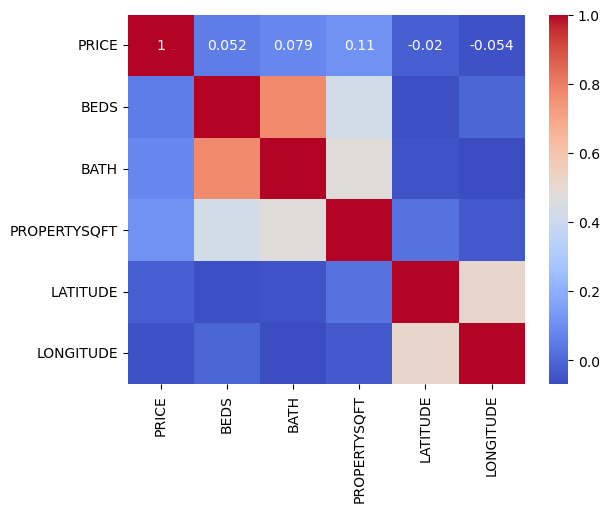

In [238]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap= 'coolwarm')

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



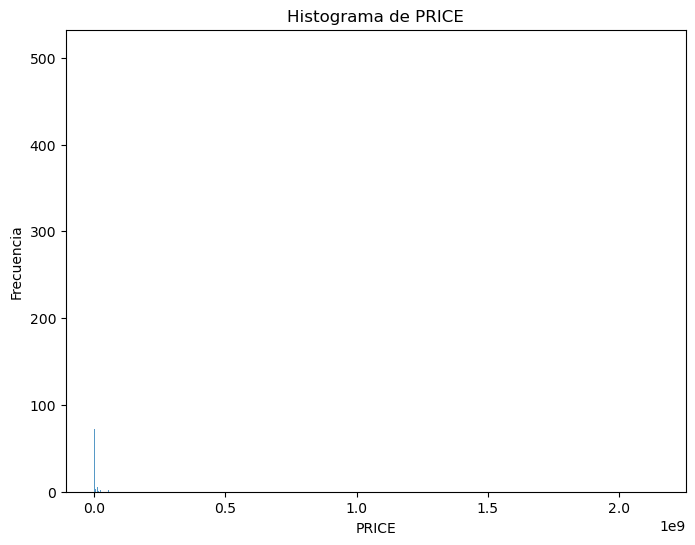

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



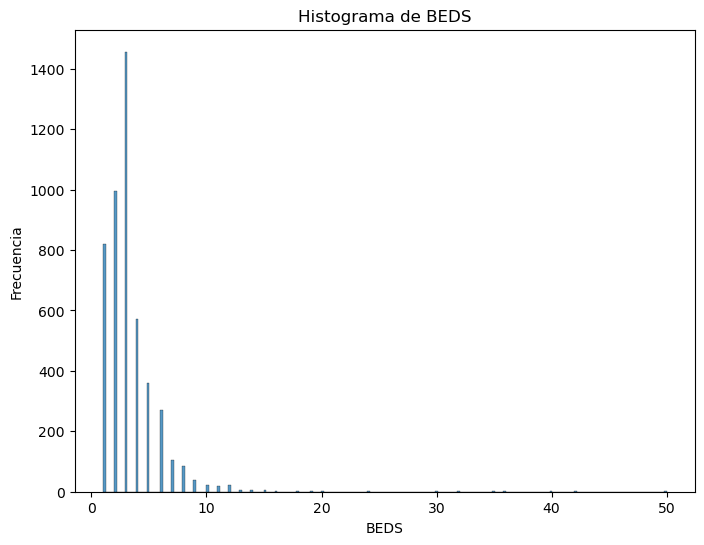

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



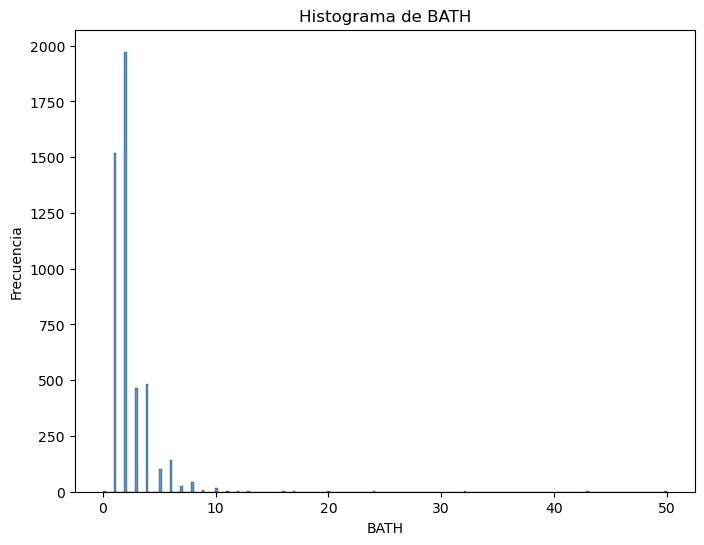

c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



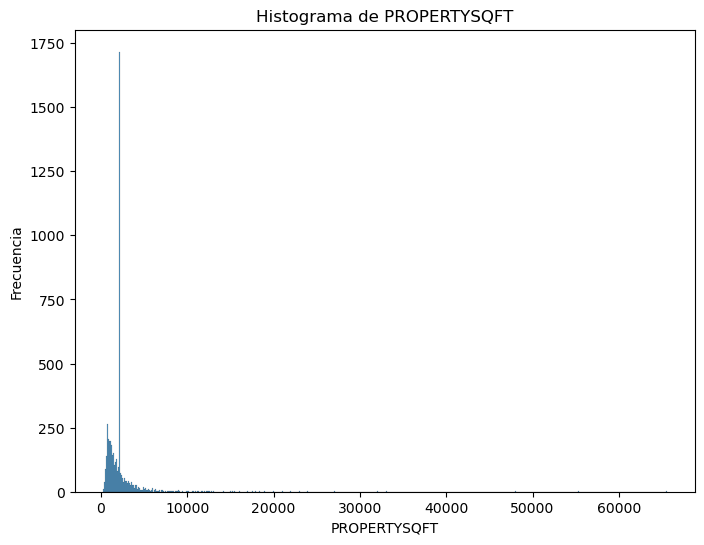

In [239]:
colums = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

for i, category in enumerate(colums):
    plt.figure(figsize=(8, 6))
    sns.histplot(data= df, x =category)
    plt.title(f'Histograma de {category}')
    plt.xlabel(category)
    plt.ylabel('Frecuencia')
    plt.show()

### Let's create a colunm that  tell us if the house is cheaper , normal , expensive or too much expensive based based on the quantiles 

In [240]:
qtiles = df['PRICE'].quantile([0.25, 0.50, 0.75])

def category_house(PRICE):
    if PRICE < qtiles[0.25]:
       return 'Cheaper'
    elif qtiles[0.25] <= PRICE <= qtiles[0.50]:
        return 'Normal'
    elif qtiles[0.50] <= PRICE <= qtiles[0.75]:
        return 'Expensive'
    else: 
        return 'Too much expesive'

temp_df = df.copy()
temp_df['Category_of_House'] = temp_df.PRICE.apply(category_house)
temp_df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Category_of_House
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,Cheaper
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,Too much expesive
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Cheaper
3,Brokered by COMPASS,Condo for sale,69000,3,1,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,Cheaper
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,Too much expesive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Condo for sale,599000,1,1,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,Normal
4797,Brokered by Mjr Real Estate Llc,Condo for sale,245000,1,1,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,Cheaper
4798,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1275000,1,1,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,Expensive
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,Normal


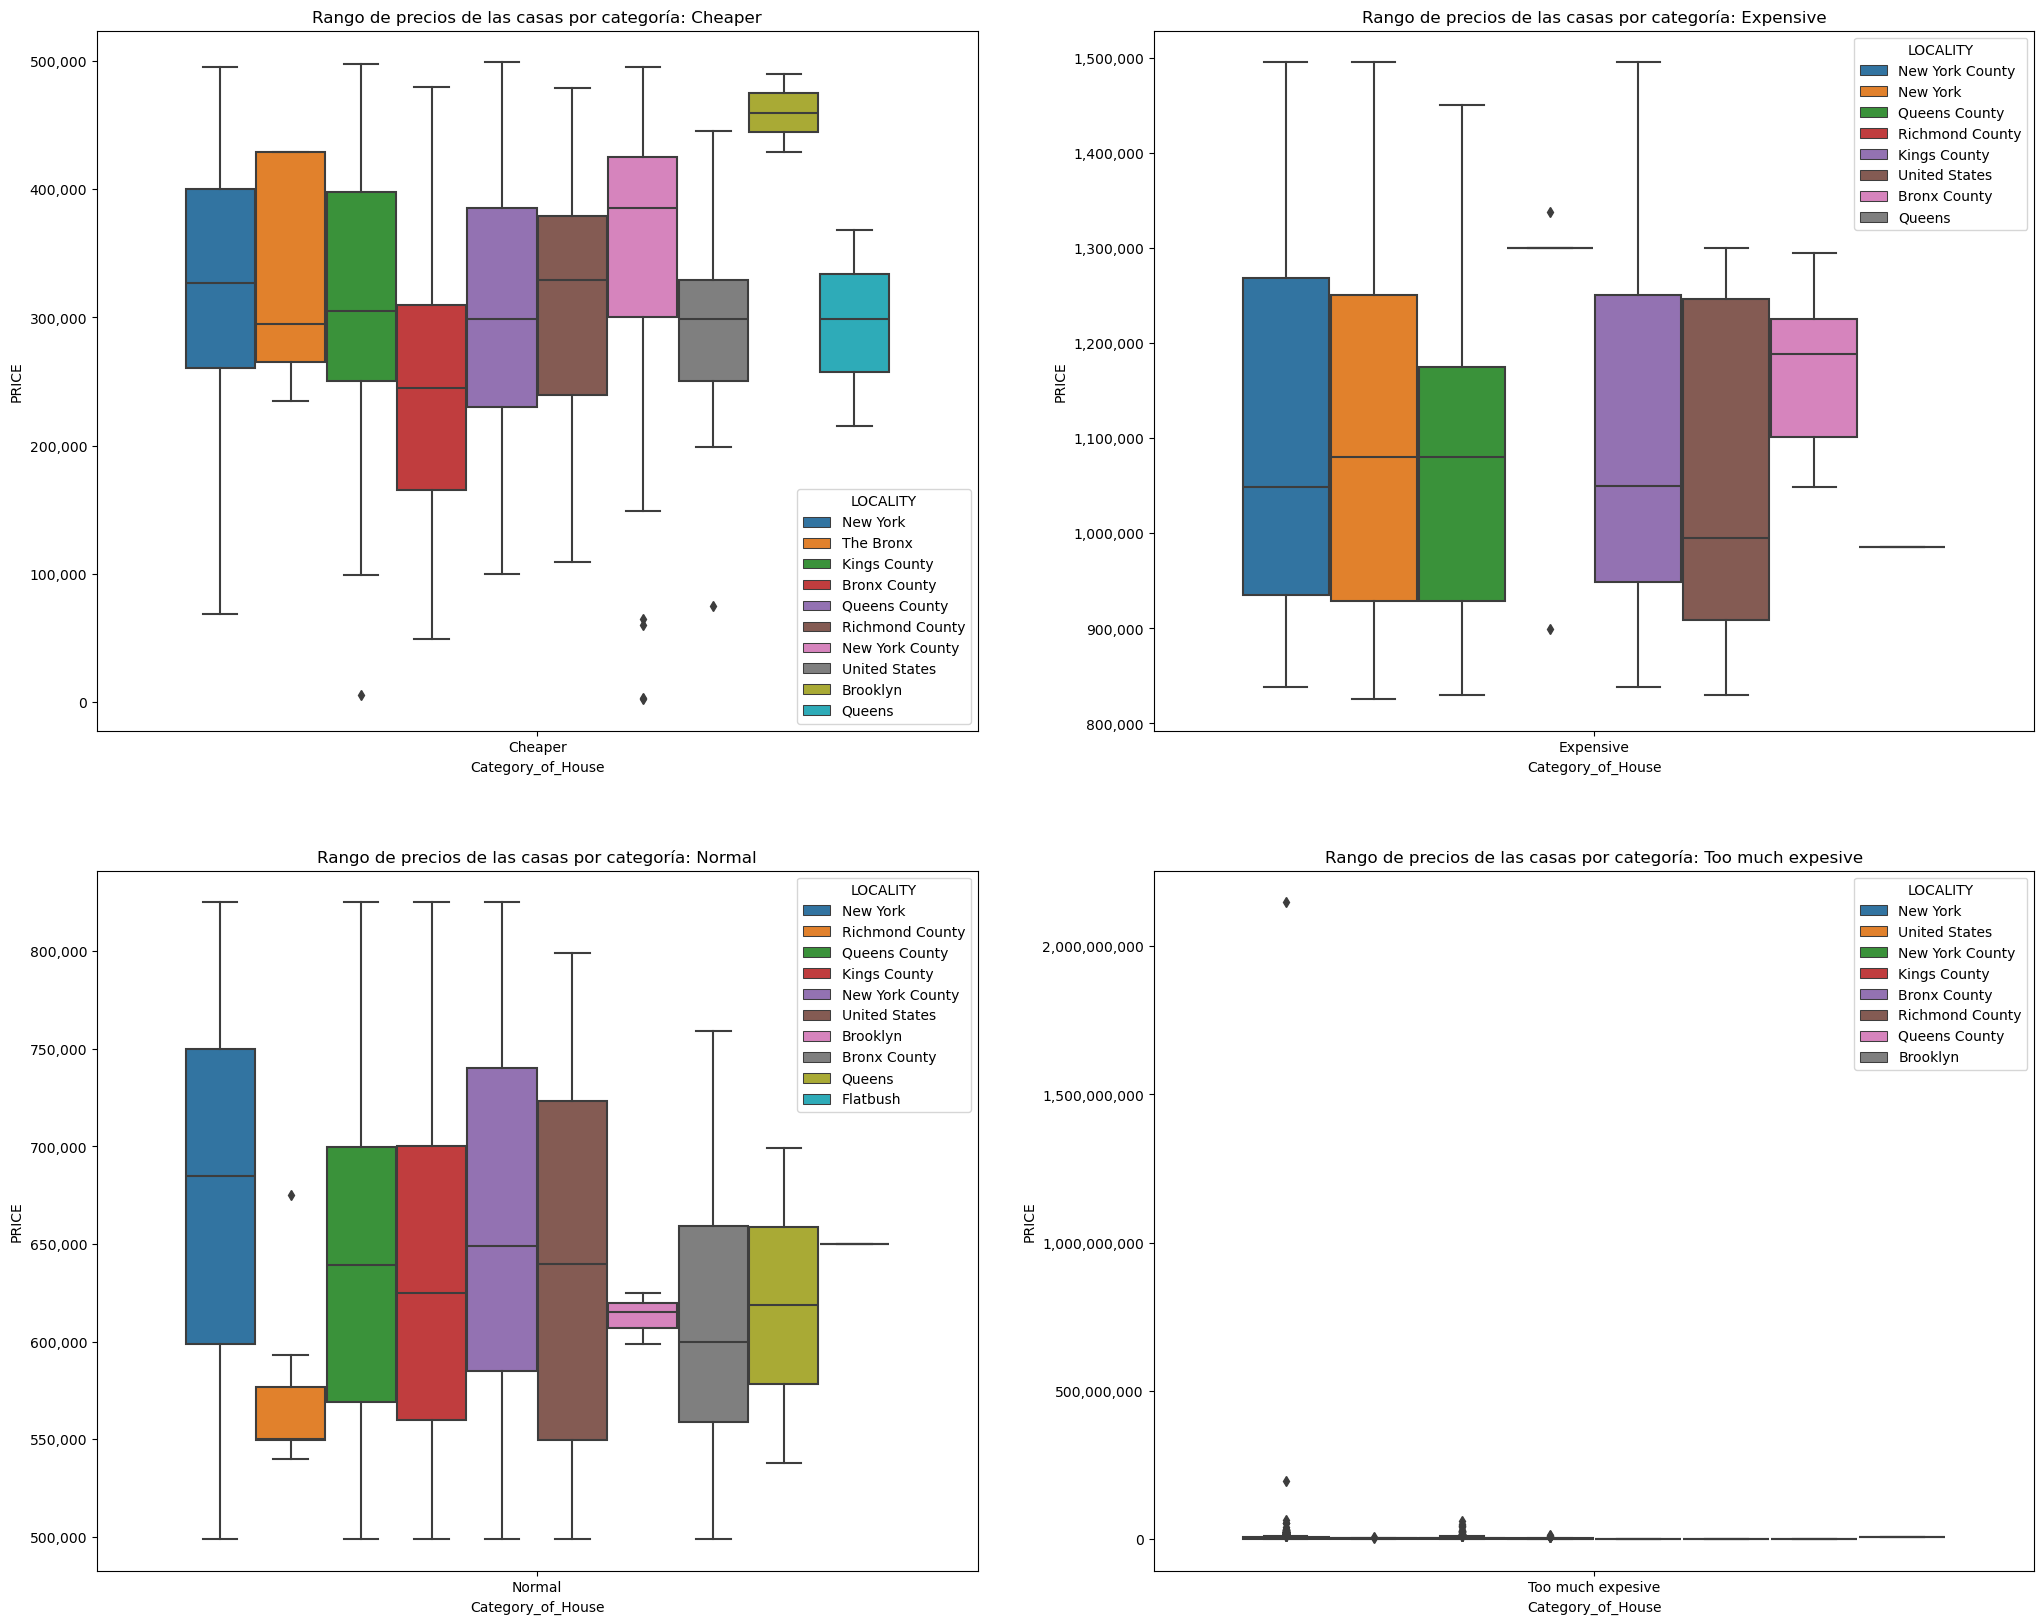

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

title = 'Rango de precios de las casas por categoría'
fig, ax = plt.subplots(2, 2, figsize=(25, 20))
grouped = temp_df.groupby('Category_of_House')

for i, (category, data) in enumerate(grouped):
    sns.boxplot(data=data, x='Category_of_House', y='PRICE', ax=ax[i//2, i%2], hue='LOCALITY')
    ax[i//2, i%2].set_title(f'{title}: {category}') 
    
for ax_row in ax:
    for ax_col in ax_row:
        ax_col.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 

plt.show()



c:\Users\Ramiro\anaconda3\envs\NY_houses\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



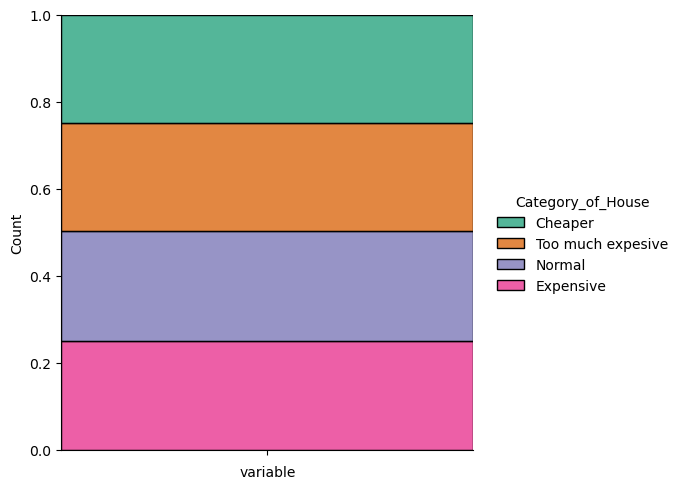

In [242]:
(
    temp_df
    .assign(variable = '')
    .pipe(
        lambda temp_df: (
            sns.displot(
                data=temp_df,
                x='variable',
                hue='Category_of_House',
                multiple='fill',
                palette= 'Dark2'
            )
        )
    )
)

In [243]:
pd.pivot_table(temp_df,
               index='Category_of_House',
               columns= 'TYPE',
               aggfunc= 'count',
               fill_value= 0)

ADDRESS                                                 \
TYPE              Coming Soon Condo for sale Contingent For sale Foreclosure   
Category_of_House                                                              
Cheaper                     0            986         25        4           4   
Expensive                   0            329         19        5           2   
Normal                      1            536         38        2           6   
Too much expesive           1            495          6        9           2   

                                                                      \
TYPE              House for sale Land for sale Mobile house for sale   
Category_of_House                                                      
Cheaper                       80            21                     0   
Expensive                    354             7                     1   
Normal                       387            10                     0   
Too much expesive            191            11                     0   

                                                      ...    SUBLOCALITY  \
TYPE              Multi-family home for sale Pending  ... Condo for sale   
Category_of_House                                     ...                  
Cheaper                                   11      54  ...            986   
Expensive                                369      70  ...            329   
Normal                                   121      72  ...            536   
Too much expesive                        226      47  ...            495   

                                                                  \
TYPE              Contingent For sale Foreclosure House for sale   
Category_of_House                                                  
Cheaper                   25        4           4             80   
Expensive                 19        5           2            354   
Normal                    38        2           6            387   
Too much expesive          6        9           2            191   

                                                       \
TYPE              Land for sale Mobile house for sale   
Category_of_House                                       
Cheaper                      21                     0   
Expensive                     7                     1   
Normal                       10                     0   
Too much expesive            11                     0   

                                                                         
TYPE              Multi-family home for sale Pending Townhouse for sale  
Category_of_House                                                        
Cheaper                                   11      54                  9  
Expensive                                369      70                 42  
Normal                                   121      72                 40  
Too much expesive                        226      47                208  

[4 rows x 176 columns]

In [244]:
df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109


### Scaling data

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit_transform(df[['PRICE', 'PROPERTYSQFT']])
model

array([[1.45522115e-04, 1.79159329e-02],
       [9.08028952e-02, 2.65140495e-01],
       [1.19910715e-04, 2.73332823e-02],
       ...,
       [5.92557471e-04, 2.99243222e-02],
       [2.77362620e-04, 6.50792435e-03],
       [1.61354617e-04, 7.96263686e-03]])

In [246]:
model = pd.DataFrame(model, columns= ['PRICE', 'PROPERTYSQFT'])
model

,PRICE,PROPERTYSQFT
0,0.000146,0.017916
1,0.090803,0.265140
2,0.000120,0.027333
3,0.000031,0.003292
4,0.025610,0.213536
...,...,...
4796,0.000278,0.029924
4797,0.000113,0.029924
4798,0.000593,0.029924
4799,0.000277,0.006508


In [247]:
df.drop(columns=['PRICE', 'PROPERTYSQFT'], axis= 1, inplace=True)


### Categorizing important data for regression

In [248]:
df["new_state"] = df["STATE"].str.split(',').str[0] + '_' + df["STATE"].str.split(" ").str[-1]
df.head(3)

,BROKERTITLE,TYPE,BEDS,BATH,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,new_state
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,New York_10022
1,Brokered by Serhant,Condo for sale,7,10,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,New York_10019
2,Brokered by Sowae Corp,House for sale,4,2,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Staten Island_10312


In [249]:
encoder_one = OneHotEncoder()
encoded_results = encoder_one.fit_transform(df[['LOCALITY']])
column_names = encoder_one.get_feature_names_out(['LOCALITY'])
encoded_df = pd.DataFrame(encoded_results.toarray(), columns=column_names)
encoded_df.head(5)

,LOCALITY_Bronx County,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,LOCALITY_Richmond County,LOCALITY_The Bronx,LOCALITY_United States
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
encoder = OneHotEncoder()
encoded_results_one = encoder.fit_transform(df[['new_state']])
column_names_one = encoder.get_feature_names_out(['new_state'])
encoded_df_one = pd.DataFrame(encoded_results_one.toarray(), columns=column_names_one)
encoded_df_one.head(5)

,new_state_Arverne_11692,new_state_Astoria_11101,new_state_Astoria_11102,new_state_Astoria_11103,new_state_Astoria_11105,new_state_Astoria_11106,new_state_Bayside_11360,new_state_Bayside_11361,new_state_Bayside_11364,new_state_Bedford Stuyvesant_11206,...,new_state_Staten Island_10308,new_state_Staten Island_10309,new_state_Staten Island_10310,new_state_Staten Island_10312,new_state_Staten Island_10314,new_state_Stuyvesant Heights_11233,new_state_Sunnyside_11104,new_state_Whitestone_11357,new_state_Woodhaven_11421,new_state_Woodside_11377
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
df_one = pd.concat([df, encoded_df, encoded_df_one, model], axis= 1)
df_one.head(3)

,BROKERTITLE,TYPE,BEDS,BATH,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,...,new_state_Staten Island_10310,new_state_Staten Island_10312,new_state_Staten Island_10314,new_state_Stuyvesant Heights_11233,new_state_Sunnyside_11104,new_state_Whitestone_11357,new_state_Woodhaven_11421,new_state_Woodside_11377,PRICE,PROPERTYSQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000146,0.017916
1,Brokered by Serhant,Condo for sale,7,10,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090803,0.265140
2,Brokered by Sowae Corp,House for sale,4,2,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000120,0.027333


## Data Cleaning

### I'm going to remove all the columns we don't need

In [209]:
df_one.drop(['LONGITUDE', 'LATITUDE', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'MAIN_ADDRESS', 'STATE', 'ADDRESS', 'BROKERTITLE','TYPE',  'LOCALITY', 'SUBLOCALITY', 'new_state'], axis=1, inplace=True)
df_one.head(3)

,BEDS,BATH,LOCALITY_Bronx County,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,LOCALITY_New York County,LOCALITY_Queens,LOCALITY_Queens County,...,new_state_Staten Island_10310,new_state_Staten Island_10312,new_state_Staten Island_10314,new_state_Stuyvesant Heights_11233,new_state_Sunnyside_11104,new_state_Whitestone_11357,new_state_Woodhaven_11421,new_state_Woodside_11377,PRICE,PROPERTYSQFT
0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000146,0.017916
1,7,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090803,0.265140
2,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000120,0.027333


### Outlier Removal in Dataset using IQR

In [252]:
#calculate the upper and lower limits
q1 = df_one[['PRICE']].quantile(0.25)
q3 =df_one[['PRICE']].quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

In [253]:
#Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_one[['PRICE']]>= upper)[0]
lower_array = np.where(df_one[['PRICE']]<= lower)[0]

df_one.drop(index=upper_array, inplace=True)
df_one.drop(index=lower_array, inplace=True)


In [ ]:
df.drop(df[df['PROPERTYSQFT'] >= 10000].index, inplace=True)

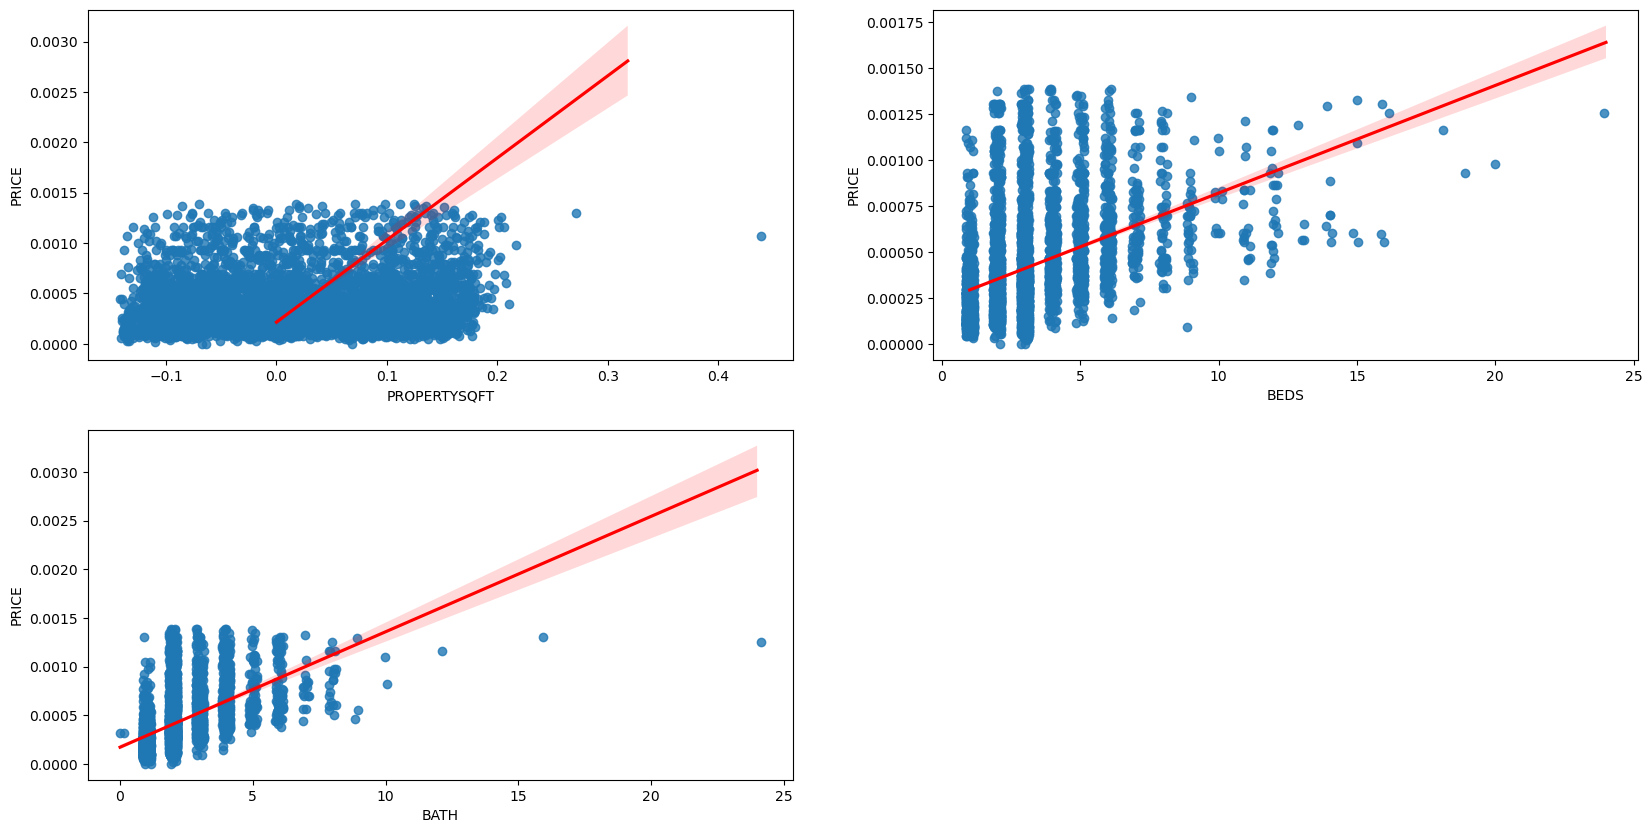

In [254]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221)
sns.regplot(data=df_one, x="PROPERTYSQFT", y="PRICE", x_jitter=.15, line_kws=dict(color="r"), ax=fig1)
fig1.ticklabel_format(style='plain')  # Establecer el formato de las etiquetas de los ejes en formato plano

fig2 = fig.add_subplot(222)
sns.regplot(data=df_one, x="BEDS", y="PRICE", x_jitter=.15, line_kws=dict(color="r"), ax=fig2)
fig2.ticklabel_format(style='plain')  # Establecer el formato de las etiquetas de los ejes en formato plano

fig3 = fig.add_subplot(223)
sns.regplot(data=df_one, x="BATH", y="PRICE", x_jitter=.15, line_kws=dict(color="r"), ax=fig3)
fig3.ticklabel_format(style='plain')  # Establecer el formato de las etiquetas de los ejes en formato plano

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics

 


In [271]:
df_one

,BEDS,BATH,LATITUDE,LONGITUDE,new_state,LOCALITY_Bronx County,LOCALITY_Brooklyn,LOCALITY_Flatbush,LOCALITY_Kings County,LOCALITY_New York,...,new_state_Staten Island_10310,new_state_Staten Island_10312,new_state_Staten Island_10314,new_state_Stuyvesant Heights_11233,new_state_Sunnyside_11104,new_state_Whitestone_11357,new_state_Woodhaven_11421,new_state_Woodside_11377,PRICE,PROPERTYSQFT
0,2,2,40.761255,-73.974483,New York_10022,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000146,0.017916
2,4,2,40.541805,-74.196109,Staten Island_10312,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000120,0.027333
3,3,1,40.761398,-73.974613,Manhattan_10022,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000031,0.003292
5,5,2,40.674363,-73.958725,Brooklyn_11238,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.057790
6,2,2,40.809448,-73.946777,New York_10027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000418,0.029924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,1,1,40.774350,-73.955879,Manhattan_10075,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000278,0.029924
4797,1,1,40.732538,-73.860152,Rego Park_11374,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000113,0.029924
4798,1,1,40.745882,-74.003398,New York_10011,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000593,0.029924
4799,2,1,40.742770,-73.872752,Elmhurst_11373,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000277,0.006508


In [272]:
df_one.drop(['new_state'], axis= 1, inplace=True)


In [273]:
target = df_one['PRICE']
features = df_one.drop(columns= 'PRICE')

In [274]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.5,random_state=42)

In [275]:
pipeline_lr = Pipeline([
    ('Scalar1', StandardScaler()),
    ('lr_classifier', LinearRegression())
])

pipeline_rf = Pipeline([
    ('Scalar2', StandardScaler()),
    ('rf_classifier', RandomForestRegressor())
])

pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('Scalar2', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())])

In [276]:
score_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5)
score_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5)

print('LinearRegression:' ,score_lr.mean(),
       '\n','RandomForest:' ,score_rf.mean())

LinearRegression: -6.524342850107547e+24 
 RandomForest: 0.6828468346471818


In [277]:
pred_one = pipeline_lr.predict(X_test)
pred_two = pipeline_rf.predict(X_test)

In [278]:
print("R^2:",metrics.r2_score(y_test, pred_one))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_one))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_one))
print("MSE:",metrics.mean_squared_error(y_test, pred_one))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_one)))

R^2: -9.407876574077068e+24
Adjusted R^2: -1.1105065889222374e+25
MAE: 122577438.71451274
MSE: 7.588232269517565e+17
RMSE: 871104601.6132371


In [279]:
print("R^2:",metrics.r2_score(y_test, pred_two))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred_two))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred_two))
print("MSE:",metrics.mean_squared_error(y_test, pred_two))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_two)))

R^2: 0.691967130164248
Adjusted R^2: 0.6363977260290679
MAE: 0.00010319004094827607
MSE: 2.4845404215871774e-08
RMSE: 0.00015762425008821382


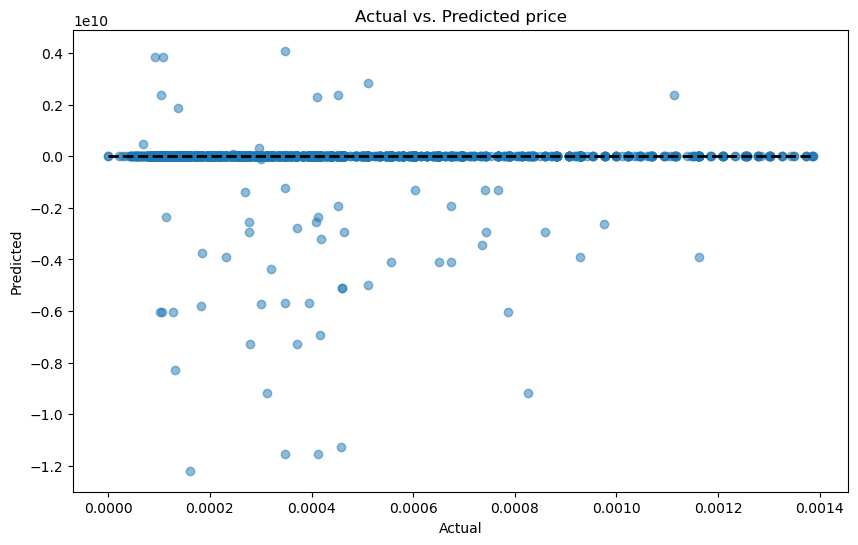

In [280]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_one, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted price')
plt.show()

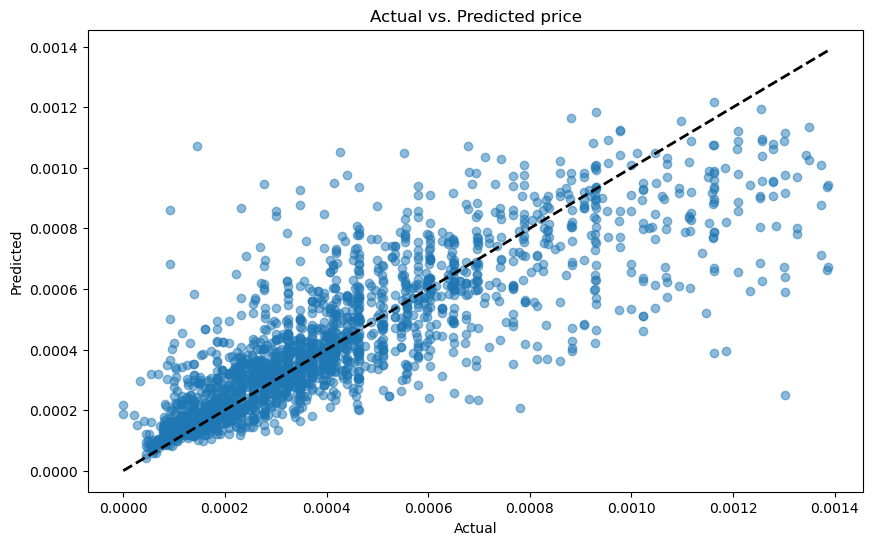

In [281]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_two, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted price')
plt.show()